# K Nearest Neighbours *(not neighbors)*

To practice using the KNN algorithm, I am using this [anonymised data](https://github.com/handaanmol/Machine-Learning-Python/blob/master/Classified%20Data) and building a model to try and predict whether or not a record will fall into the Target Class.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
anon = pd.read_csv('Classified Data', index_col=0)
anon

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [3]:
anon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [4]:
anon.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


I'll use SciKit Learn to align all of the data to the same scale. As this data looks randomly generated, there isn't a lot of difference between column values. However if you were looking at employee data you could have fields like `age` and `salary`. With ranges of `18-65` and `16,000-140,000`, and units of `years` and `pounds`. A model may perform poorly with unevenly distributed data. This operation transforms the data so that each column has a `mean = 0` and a `standard deviation = 1`.

## Standardise Data

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [9]:
scaler.fit(
    anon.drop('TARGET CLASS', axis='columns'),
)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled = scaler.transform(anon.drop('TARGET CLASS', axis='columns'))
scaled

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [27]:
features = pd.DataFrame(scaled, columns=anon.columns[:-1])

## Train & Test Model

In [12]:
from sklearn.model_selection import train_test_split

In [28]:
X = features
y = anon['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3
)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

I'll initially start using just one near neighbour for classification to get the model working. This can be optimised later.

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## Use Model

In [17]:
predictions = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
confusion_matrix(y_test, predictions)

array([[84, 69],
       [77, 70]], dtype=int64)

In [19]:
cr1 = classification_report(y_test, predictions)
print(cr1)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Looks strong. However using 1 neighbour is risky, as you have a single point of failure. If the datapoint nearest the point you are trying to predict is an outlier (or even a little bit skewed) then your prediction will be off!

## Refine Model

Can this model be improved? I'm sure it can be! One very obvious way to change the effectiveness of this model is to change the number of neighbours used for predictions. 

In [20]:
i = 50
err = []

for i in range (1, i):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    err.append(
        np.mean(pred != y_test)
    )

In [21]:
err[:10]

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334]

Text(0, 0.5, 'Error Rate')

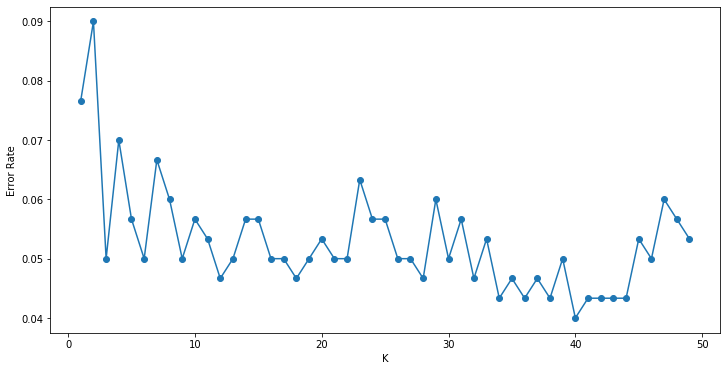

In [22]:
plt.figure(figsize=(12,6))
plt.plot(
    range(1, i + 1),
    err,
    marker='o',
)
plt.xlabel('K')
plt.ylabel('Error Rate')

The error rate bottoms out at around 40, with 40 being the lowest point. The especially low rate may just be coincidence, but 40 neighbours seems reasonable to use for the model.

In [23]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [24]:
cr2 = classification_report(y_test, predictions)
print(cr2)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [25]:
print(cr1)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Changing the number of neighbours has significantly improved the accuracy of this model. Using multiple points allows you to paint a picture of the data as a whole, rather than relying on one example.